In [28]:
N = 128

# Parameters (from https://github.com/rajeshrinet/compPhy/blob/master/notebooks/2016/gray-scott.ipynb)
#Du, Dv, F, k = 0.14, 0.06, 0.035, 0.065 # Bacteria
Du, Dv, F, k = 0.16, 0.08, 0.060, 0.062 # Coral
#Du, Dv, F, k = 0.12, 0.08, 0.020, 0.050 # Spirals
#Du, Dv, F, k = 0.16, 0.08, 0.035, 0.060 # Zebrafish

U = fill(1.0, N, N)
V = fill(0.0, N, N)

print()

In [29]:
using SparseArrays

e=ones(N*N)
e1=ones(N*(N-1))
e2=resize!(repeat(vcat(repeat([1], N-1), [0]), N), N*N-1)
e3=resize!(repeat(vcat([0], repeat([1], N-1)), N), N*N-1)
L = spdiagm(0 => -4*e, -1 => e2, 1=> e2, -N => e1, N => e1)
print(typeof(L))

SparseMatrixCSC{Float64,Int64}

In [30]:
for i in 59:69
for j in 59:69
  U[i, j] = 0.5 + rand() * 0.1
  V[i, j] = 0.25 + rand() * 0.1
end
end

In [23]:
using Random
rand!(U)
rand!(V)
print()

In [50]:
using GR
xmin = ymin = 0.0
xmax = ymax = 10.0
resx = resy = N

setviewport(0, 1, 0, 1)
setwindow(xmin, xmax, ymin, ymax)
setcolormap(3)

In [52]:
u = reshape(U, N^2)
v = reshape(V, N^2)

using LinearAlgebra

for i in 0:30
    uvv = u.*v.*v
    u += (Du*L*u) - uvv +  F *(1 .- u)
    v += (Dv*L*v) + uvv - (F+k)*v

    if(i%10 == 0)
        clearws()
        cellarray(xmin, xmax, ymin, ymax, resx, resy, floor.(8 .+ 64 * u) )
        updatews()
    end
end

invalid range
invalid range
GKS: Rectangle definition is invalid in routine SET_WINDOW
invalid range
invalid range
GKS: Rectangle definition is invalid in routine SET_WINDOW


SystemError: SystemError: opening file "/var/folders/nl/qy3pw2pd0ks19zsxt4s_0v_40000gp/T/juliai18qGt.svg": No such file or directory

In [54]:
# https://twitter.com/josef_heinen/status/1057670563366404097
import Pkg; Pkg.add("Distributions")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
  [31c24e10] + Distributions v0.20.0
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [55]:
using Distributions

function dists(specs; N=50)
  X = Float64[]
  Y = Float64[]
  for (x, y, σ) in specs
    xd = rand(Normal(x, σ), N)
    yd = rand(Normal(y, σ), N)
    append!(X, xd)
    append!(Y, yd)
  end
  X, Y
end

N = 1000000
x, y = dists([(2,2,0.02), (2,-2,0.1), (-2,-2,0.5), (-2,2,1.0), (0,0,3)], N=N)

println("# of points: ", length(x))

using GR

setviewport(0.1, 0.95, 0.1, 0.95)
setwindow(-10, 10, -10, 10)
setcharheight(0.02)
axes2d(0.5, 0.5, -10, -10, 4, 4, -0.005)
setcolormap(GR.COLORMAP_HOT)

@time shadepoints(x, y, xform=GR.XFORM_EQUALIZED)

updatews()

# of points: 5000000
  0.303622 seconds (86.97 k allocations: 4.671 MiB)


invalid range
invalid range
GKS: Rectangle definition is invalid in routine SET_WINDOW


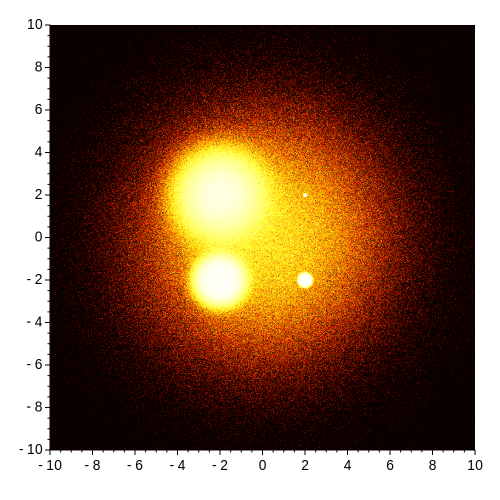

In [56]:
plot()